# Hydrogen Bonds

In [88]:
import mdtraj as md
import pandas as pd
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds as hbonds
import matplotlib
import matplotlib.pyplot as plt

In [87]:
traj_location = 'test/5NJY_pH46_md1.skip10.protein.xtc'

top_location = 'test/5NJY_pH46_md1.protein.gro'

In [96]:
traj = md.load(traj_location,top=top_location)

In [97]:
u = mda.Universe(top_location,traj_location)

/home/scottzhuang/anaconda3/envs/deepchem/lib/python3.5/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))


In [101]:
h = hbonds.HydrogenBondAnalysis(u,'resid 220:240','protein',selection1_type="donor",distance=3.0, angle=120.0)

In [102]:
h.run()

HBonds frame    40:    41/41 [100.0%]


In [103]:
h.generate_table()

In [104]:
df = pd.DataFrame.from_records(h.table)

In [105]:
df.

,time,donor_index,acceptor_index,donor_resnm,donor_resid,donor_atom,acceptor_resnm,acceptor_resid,acceptor_atom,distance,angle
0,0.0,3821,3800,SER,220,H,SER,218,OG,2.172004,150.138046
1,0.0,3828,9427,SER,220,HG,GLU,222,OE1,1.728039,170.501678
2,0.0,3868,3827,ALA,223,H,SER,220,OG,2.190665,140.779449
3,0.0,3868,3830,ALA,223,H,SER,220,O,2.144437,128.097672
4,0.0,3880,3830,ASN,224,H,SER,220,O,2.039237,160.052338
5,0.0,3880,3851,ASN,224,H,TYR,221,O,2.612679,121.061104
6,0.0,3894,3851,VAL,225,H,TYR,221,O,2.378974,148.137955
7,0.0,3894,3866,VAL,225,H,GLU,222,O,2.832469,130.458008
8,0.0,3914,3866,THR,226,H,GLU,222,O,2.557238,150.700089
9,0.0,3926,3878,THR,226,HG1,ALA,223,O,2.209613,124.427597


In [77]:
data = []
for i in zip(*h.count_by_time()):
    data.append(i)

In [79]:
data[1]

(1656,
 1664,
 1634,
 1667,
 1690,
 1673,
 1696,
 1658,
 1692,
 1691,
 1666,
 1654,
 1659,
 1677,
 1691,
 1671,
 1689,
 1694,
 1630,
 1666,
 1677,
 1671,
 1696,
 1686,
 1685,
 1671,
 1675,
 1641,
 1677,
 1649,
 1643,
 1621,
 1653,
 1679,
 1663,
 1677,
 1645,
 1635,
 1652,
 1641,
 1647)

In [39]:
h.generate_table()

In [41]:
data_hbond = pd.DataFrame.from_records(h.table)

In [53]:
data_hbond[data_hbond['time'] == 0].shape[0]

0

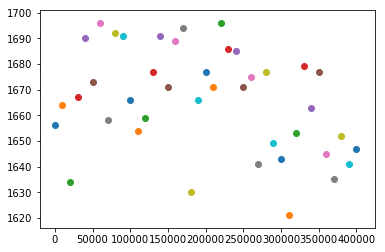

In [56]:
for i in range (0,41):
    plt.scatter(i*10000,data_hbond[data_hbond['time'] == i * 10000].shape[0])

In [84]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2']
def create_hbond_data(md_data = None):
    import MDAnalysis as mda
    from MDAnalysis.analysis.hbonds import HydrogenBondAnalysis
    def append_hbond_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".protein.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".protein.xtc"
        traj = mda.Universe(location + top_location,location + traj_location)
        h = HydrogenBondAnalysis(traj,'resid 220:240','resid 220:240',selection1_type = "donor", detect_hydrogens= "heuristic", distance=3.0, angle=120.0)
        h.run()
        data = []
        for i in zip(*h.count_by_time()):
            data.append(i)
        hbond_data.extend(data[1])
    hbond_data = []
    for traj_note in traj_notes:
        append_hbond_data(traj_note)
    #md_data['h_bond number'] = hbond_data
    print(hbond_data)

In [85]:
create_hbond_data()

/home/scottzhuang/anaconda3/envs/deepchem/lib/python3.5/site-packages/MDAnalysis/topology/guessers.py:56: UserWarning: Failed to guess the mass for the following atom types: M
  "".format(', '.join(misses)))
/home/scottzhuang/anaconda3/envs/deepchem/lib/python3.5/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:800: DeprecationWarning: _get_bonded_hydrogens_list() (heuristic detection) does not always find all hydrogens; Using detect_hydrogens='distance', when constructing the HydrogenBondAnalysis class is safer. Removal of this feature is targeted for 1.0
  category=DeprecationWarning)
HBonds frame   102:   103/103 [100.0%]
HBonds frame    74:    75/75 [100.0%]


[122, 122, 129, 126, 120, 128, 136, 126, 125, 121, 120, 132, 131, 133, 116, 131, 120, 125, 126, 129, 120, 117, 126, 128, 120, 123, 124, 124, 125, 130, 122, 121, 124, 125, 122, 124, 116, 126, 120, 117, 117, 123, 121, 124, 119, 122, 127, 128, 120, 131, 127, 121, 122, 123, 126, 128, 120, 128, 126, 120, 125, 122, 124, 120, 119, 120, 120, 124, 131, 124, 130, 119, 126, 128, 118, 128, 126, 123, 128, 132, 120, 128, 123, 126, 116, 128, 117, 124, 124, 129, 123, 123, 123, 122, 120, 121, 111, 131, 121, 127, 124, 123, 125, 124, 122, 126, 133, 131, 132, 124, 124, 122, 133, 126, 128, 122, 119, 122, 122, 125, 124, 115, 124, 119, 118, 126, 128, 120, 126, 125, 120, 128, 125, 128, 122, 123, 127, 130, 123, 126, 126, 123, 123, 128, 119, 121, 123, 127, 122, 118, 115, 117, 127, 117, 118, 115, 120, 119, 132, 129, 116, 118, 120, 120, 123, 121, 116, 122, 123, 113, 118, 116, 114, 113, 123, 121, 117, 118]
